3.3.3- Lasso Regression

**Regularization parameter: Lasso**

The  𝜆  for lasso can var between 0 (no penalty, acts like OLS) and infinity. If  𝜆  is too large, all parameters will be set to zero.

Create a plot below of how  𝑅2  varies across different values of  𝜆  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same  𝑅2  for a given lambda value?

Submit your work and discuss the results with your mentor.

## Import Libraries and set style

In [86]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set_style('white')

## Load and train dataset

In [41]:
# Load data, drop the index column and any missing data columns.
df = pd.read_csv('credit-card-defaults.csv').iloc[:, 1:].dropna()
df2 = pd.DataFrame(df).copy

In [42]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [43]:
#Set string values to numeric.
df['default'] = np.where(df['default'] == 'Yes', 1, 0)
df['student'] = np.where(df['student'] == 'Yes', 1, 0) 

#df = pd.DataFrame(preprocessing.scale(df), columns=names)

In [44]:
df.shape

(10000, 4)

In [45]:
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [46]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [55]:
df['balance_student'] = df['balance'] * df['student']
df['balance_default'] = df['balance'] * df['default']
df['student_default'] = df['student'] * df['default']
df['balance_sqrt'] = (df['balance'] + 100) ** .5
#df['balance2'] = (df['balance'] + 100) ** 2
#df['balance3'] = (df['balance'] + 100) ** 3
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

In [62]:
y= df['income'].values.reshape(-1,1) 
X = df.drop('income', axis=1)

In [63]:
df.head()

,default,student,balance,income,balance_student,balance_default,student_default,balance_sqrt,balance2,balance3
0,-0.185599,-0.645936,-0.218835,0.813187,-0.061782,-0.158209,0.078255,-0.216583,-0.418064,-0.469572
1,-0.185599,1.548141,-0.037616,-1.605496,-0.259952,-0.175402,-0.299027,-0.035143,-0.265943,-0.368424
2,-0.185599,-0.645936,0.492410,-0.131212,-0.517937,-0.225687,0.078255,0.494588,0.266610,0.057187
3,-0.185599,-0.645936,-0.632893,0.164031,0.203772,-0.118926,0.078255,-0.631765,-0.708344,-0.631644
4,-0.185599,-0.645936,-0.102791,0.370915,-0.136207,-0.169219,0.078255,-0.100378,-0.322411,-0.407149


In [64]:
y.shape

(10000, 1)

In [65]:
X.shape

(10000, 9)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Ridge Reg

### fit and score dataset

In [76]:
ridge = Ridge(alpha= 0.4, fit_intercept=False)

ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(ridge_pred)

0.5705344012111471
0.5635512203800465
[[ 0.49009113]
 [ 0.49592844]
 [ 0.46221889]
 ...
 [-1.19613779]
 [ 0.49600409]
 [ 0.48925436]]


In [78]:
ridge = Ridge(alpha= 0.3, fit_intercept=False)

ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(ridge_pred)

0.5705344318627587
0.5635488601009506
[[ 0.49004547]
 [ 0.49597244]
 [ 0.46209415]
 ...
 [-1.19617491]
 [ 0.49607252]
 [ 0.48921019]]


### Visualize- Rideg Regression

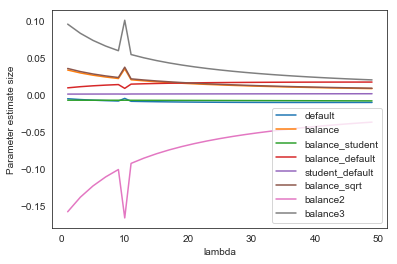

In [88]:
# Store estimates.
estimates = np.append(ridge.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgere = Ridge(alpha=lambd, fit_intercept=False)
    ridgere.fit(X_train, y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgere.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

## Lasso Reg

### fit and score dataset

In [77]:
lasso = Lasso(alpha=0.4, normalize=True)

lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print(lasso.score(X_train, y_train))
print(round(lasso.score(X_test, y_test),5))
print(lasso_pred)

0.0
-0.00056
[0.00695272 0.00695272 0.00695272 ... 0.00695272 0.00695272 0.00695272]


In [84]:
lasso = Lasso(alpha=0.0003, normalize=True)

lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print(lasso.score(X_train, y_train))
print(round(lasso.score(X_test, y_test),5))
print(lasso_pred)

0.569730317276471
0.5638
[ 0.48311207  0.48311207  0.48311207 ... -1.12942562  0.48311207
  0.48311207]


### Visualize - LASSO Regression

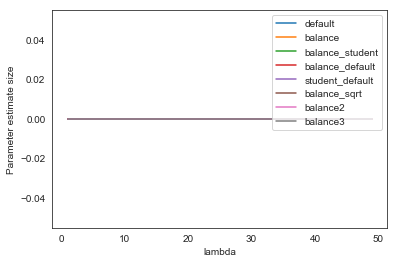

In [90]:
# Store estimates.
estimates = np.append(lasso.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    lassore = Lasso(alpha=lambd, fit_intercept=False)
    lassore.fit(X_train, y_train)
    estimates = np.row_stack((
        estimates,
        np.append(lassore.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()